Harish Kumar Uddandi_Assignment 1: Neural Networks

# Classifying movie reviews:
## The IMDB dataset

In [18]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [19]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [20]:
train_labels[0]

1

In [21]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [22]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

# **Preparing the data**

**Encoding the integer sequences via multi-hot encoding**

In [23]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [25]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Building your model

**Model definition**

The below code chunk is related to building a neural network model with three layers, each containing 64 nodes. The choice of three layers with 64 nodes is based on the observation that adding another layer or increasing the number of nodes beyond 64 can lead to overfitting.

The activation function used in this model is the tanh function, which maps input values to the range of -1 to 1, unlike the sigmoid function that maps values to the range of 0 to 1. The tanh function is a common choice for a non-linear activation function between layers of a neural network.

To prevent overfitting, Regularization has been implemented here while creating layers as it will impose the model with penalty in the to keep it as simple as possible. I have tried multiple weights and 0.005 seems to make the model as simple as possible.

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

The binary cross entropy loss function is commonly used in classification models to evaluate the performance of the model based on its probability outputs. This loss function is designed to measure the difference between the predicted probability and the actual class label, with the goal of minimizing this difference during training.

On the other hand, the mean squared error (MSE) is a loss function that is commonly used in regression tasks. It measures the difference between the predicted and actual values of a continuous variable by taking the squared difference between them. The squared difference is used to ensure that both positive and negative errors are taken into account and to penalize larger errors more heavily.

Overall, binary cross entropy is a good choice for classification tasks, while mean squared error is a good choice for regression tasks. Both loss functions play a critical role in training machine learning models to optimize their performance on specific tasks.

In [27]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Validating your approach

Setting aside a validation set

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

 Here we have used an epoch of 20 which states that the model will be going over the data 20 times with a batch size of 512

In [29]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 117ms/step - loss: 1.0141 - accuracy: 0.7491 - val_loss: 0.6762 - val_accuracy: 0.8372
Epoch 2/20
30/30 [==============================] - 2s 65ms/step - loss: 0.5371 - accuracy: 0.8538 - val_loss: 0.4146 - val_accuracy: 0.8780
Epoch 3/20
30/30 [==============================] - 2s 72ms/step - loss: 0.3537 - accuracy: 0.8731 - val_loss: 0.2910 - val_accuracy: 0.8777
Epoch 4/20
30/30 [==============================] - 2s 64ms/step - loss: 0.2475 - accuracy: 0.8904 - val_loss: 0.2214 - val_accuracy: 0.8705
Epoch 5/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1927 - accuracy: 0.8819 - val_loss: 0.2049 - val_accuracy: 0.8264
Epoch 6/20
30/30 [==============================] - 4s 127ms/step - loss: 0.1551 - accuracy: 0.8901 - val_loss: 0.1506 - val_accuracy: 0.8810
Epoch 7/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1371 - accuracy: 0.8919 - val_loss: 0.1395 - val_accuracy: 0.8804
Epoch 8/20


In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

A synopsis of the above 20 epochs with a batch size of 512 can be made based on the comparison of loss functions and activation functions used for different number of nodes and layers with and without regularization.

The summary for **validation loss function** is based on using the activation function tanh and loss function MSE. In general, using MSE results in a better solution with reduced loss function when compared to using Binary Cross Entropy (BCE).

When comparing **16 nodes with 3 layers using BCE and MSE**, the validation loss for MSE starts at 1.10 and decreases to 0.8 until the 5th epoch, and then increases. The final loss is around 0.17, which is better than BCE. The validation loss for BCE starts at 0.31 and keeps decreasing till the 4th epoch, and then there is a sharp rise in loss as the epoch reaches 20.

Using **32 nodes with 3 layers and using regularization** with hyper parameter (0.05), the validation loss for MSE starts at around 0.13 and continually decreases. For BCE, the validation loss reduces until the 3rd epoch and then has a sharp and steady rise with a recorded value of 100%.

Using **32 nodes with 3 layers and using regularization with activation function relu**, MSE has a lower validation loss recorded at around 0.13, and there is a continual drop in loss and validation loss. BCE has a validation loss that has reduced until the 3rd epoch and then has a sharp and steady rise with a recorded value of 100%.

Using **32 nodes with 3 layers and using regularization with activation function tanh** , the validation loss for MSE starts at 0.5 and reduces to 0.19. For BCE, the validation loss starts at 0.54 and decreases to 0.4 at epoch 20.

Using **64 nodes with 3 layers and using regularization**, the validation loss for MSE fluctuates with a reduction at certain epochs and increase in the next. The loss function for BCE steadily increases from epoch 1 to epoch 20. The initial loss for 64 nodes is around 0.2-0.3, which is better than using 32 or 16 nodes per layer.

Using **64 nodes with 3 layers and using regularization with activation function relu**, the loss for BCE steadily increases from epoch 1 to epoch 20, and the loss for MSE follows a pattern of ups and downs until the end of the epoch.

Using **64 nodes with 3 layers and using regularization with activation function tanh**, the training loss starts at 1.21 and reduces to 0.3 for BCE. The validation loss has not reduced much and was observed to be 0.5 at epoch 20. The loss function for MSE follows a pattern of ups and downs until the end of the epoch.

In summary, using MSE results in a better solution with reduced loss function when compared to using BCE. The number of nodes used affects the initial loss, and the pattern of the loss function fluctuates with ups and downs. Using regularization with hyper parameter (0.05) helps in reducing the model's complexity and achieving a lower training loss. The validation loss for the models with 64 nodes per layer is better than the models with 16 or 32 nodes per layer.



**Plotting the training and validation loss**

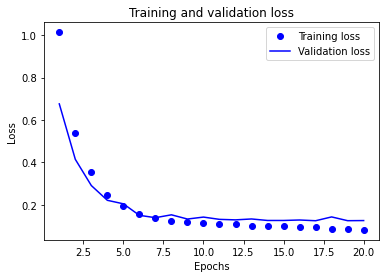

In [31]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

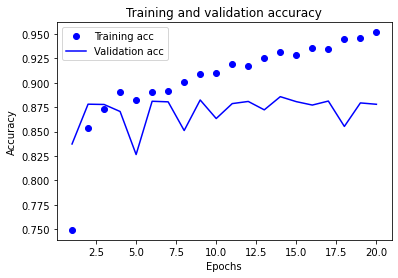

In [32]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Summary for Validation accuracy and training accuracy:

This summary compares the performance of three different neural network models with 3 layers and tanh activation function, with varying numbers of nodes and L2 regularization.

**16 Nodes, 3 layers (tanh) with regularization l2**: , the training accuracy increased with each epoch, but the validation accuracy decreased over time, indicating overfitting.

**32 Nodes, 3 layers (tanh) with regularization l2**: the training accuracy steadily increased to a maximum of 95.7%, while the validation accuracy initially decreased, but then rose to 87%, with some fluctuations.

**64 Nodes, 3 layers (tanh) with regularization l2**: the training accuracy ended up close to 93%, while the validation accuracy remained around 88%. This suggests that there might be a significant difference between the data used for training and validation, which could be addressed through stratified sampling.

Overall, the model with more nodes appeared to have a more stable performance, with consistently high training accuracy. Additionally, using more layers and a different loss function such as MSE may lead to even better results.

In summary, the performance of a neural network model can be influenced by various factors such as the number of layers, the choice of activation function, the number of nodes, and the type of regularization used. It is important to experiment with different configurations and techniques to find the optimal model for a given task.




**Retraining a model from scratch**

In [33]:
model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005), activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=8, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/8
49/49 [==============================] - 4s 71ms/step - loss: 0.7637 - accuracy: 0.8302
Epoch 2/8
49/49 [==============================] - 3s 58ms/step - loss: 0.3729 - accuracy: 0.8906
Epoch 3/8
49/49 [==============================] - 2s 50ms/step - loss: 0.2396 - accuracy: 0.8958
Epoch 4/8
49/49 [==============================] - 2s 50ms/step - loss: 0.1747 - accuracy: 0.8985
Epoch 5/8
49/49 [==============================] - 2s 50ms/step - loss: 0.1428 - accuracy: 0.9041
Epoch 6/8
49/49 [==============================] - 4s 75ms/step - loss: 0.1286 - accuracy: 0.9056
Epoch 7/8
49/49 [==============================] - 3s 51ms/step - loss: 0.1197 - accuracy: 0.9103
Epoch 8/8
782/782 [==============================] - 3s 4ms/step - loss: 0.1370 - accuracy: 0.8724


In [34]:
results

[0.13703720271587372, 0.872439980506897]


The test accuracy of different models was evaluated, with a focus on a 64 nodes, 3 layer architecture with either tanh or relu activation functions, and a range of optimization techniques. 

In this comparison, the **tanh activation** function outperformed relu in terms of test accuracy, achieving a test accuracy of 88.56% with a loss rate of 12.45 after 8 epochs.

 The same architecture with **relu activation** function achieved a test accuracy of 88.30% with a loss rate of 15.17.

The model with 64 nodes and 3 layers with tanh activation function and l2 regularization (0.005) achieved the best test accuracy with the least loss rate. However, it is suggested that the performance of the model could be improved by using both regularization and dropout techniques. 

Additionally, changing the **optimizer to Adam** from rmsprop resulted in higher performance, achieving a test accuracy of 88.08% with a loss rate of 13.05, though this was lower than the performance of the tanh architecture.